In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
kc_data = pd.read_csv("kc_house.csv", parse_dates=["date"])
raw_data = kc_data.copy()

In [3]:
raw_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [5]:
raw_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
raw_data.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_6848\2464266106.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_data.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [7]:
#creating a date table
datetable = raw_data[["date"]]
datetable.head()

,date
0,2014-10-13
1,2014-12-09
2,2015-02-25
3,2014-12-09
4,2015-02-18


In [8]:
datetable["date"].dtype

dtype('<M8[ns]')

In [9]:
#we can also create new columns  using "datetable.iloc[:; columns] = values"
datetable["year"] = datetable["date"].dt.year
datetable["quarter"] = datetable["date"].dt.quarter
datetable["month"] = datetable["date"].dt.month
datetable["dayofweek"] = datetable["date"].dt.dayofweek

C:\Users\user\AppData\Local\Temp\ipykernel_6848\2212265808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datetable["year"] = datetable["date"].dt.year
C:\Users\user\AppData\Local\Temp\ipykernel_6848\2212265808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datetable["quarter"] = datetable["date"].dt.quarter
C:\Users\user\AppData\Local\Temp\ipykernel_6848\2212265808.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [10]:
datetable

,date,year,quarter,month,dayofweek
0,2014-10-13,2014,4,10,0
1,2014-12-09,2014,4,12,1
2,2015-02-25,2015,1,2,2
3,2014-12-09,2014,4,12,1
4,2015-02-18,2015,1,2,2
...,...,...,...,...,...
21608,2014-05-21,2014,2,5,2
21609,2015-02-23,2015,1,2,0
21610,2014-06-23,2014,2,6,0
21611,2015-01-16,2015,1,1,4


In [11]:
kingcounty = raw_data.merge(datetable, how="left", on="date")

In [12]:
kingcounty.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,quarter,month,dayofweek
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,4,10,0
1,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,4,10,0
2,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,4,10,0
3,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,4,10,0
4,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,4,10,0


In [13]:
#To check non_repeated id numbers
(kingcounty.id.value_counts() > 1).count()

21436

In [14]:
#Alternatively
kingcounty.id.nunique()

21436

In [15]:
kingcounty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1828889 entries, 0 to 1828888
Data columns (total 25 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id             int64         
 1   date           datetime64[ns]
 2   price          float64       
 3   bedrooms       int64         
 4   bathrooms      float64       
 5   sqft_living    int64         
 6   sqft_lot       int64         
 7   floors         float64       
 8   waterfront     int64         
 9   view           int64         
 10  condition      int64         
 11  grade          int64         
 12  sqft_above     int64         
 13  sqft_basement  int64         
 14  yr_built       int64         
 15  yr_renovated   int64         
 16  zipcode        int64         
 17  lat            float64       
 18  long           float64       
 19  sqft_living15  int64         
 20  sqft_lot15     int64         
 21  year           int64         
 22  quarter        int64         
 23  month  

In [16]:
kingcounty[kingcounty["price"] == kingcounty["price"].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,quarter,month,dayofweek
612553,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0,3,...,1987,98102,47.6298,-122.323,3940,8800,2014,4,10,0
612554,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0,3,...,1987,98102,47.6298,-122.323,3940,8800,2014,4,10,0
612555,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0,3,...,1987,98102,47.6298,-122.323,3940,8800,2014,4,10,0
612556,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0,3,...,1987,98102,47.6298,-122.323,3940,8800,2014,4,10,0
612557,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0,3,...,1987,98102,47.6298,-122.323,3940,8800,2014,4,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612611,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0,3,...,1987,98102,47.6298,-122.323,3940,8800,2014,4,10,0
612612,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0,3,...,1987,98102,47.6298,-122.323,3940,8800,2014,4,10,0
612613,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0,3,...,1987,98102,47.6298,-122.323,3940,8800,2014,4,10,0
612614,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0,3,...,1987,98102,47.6298,-122.323,3940,8800,2014,4,10,0


In [17]:
#To drop duplicates, kingcounty.drop_duplicates(subset=["id"], inplace=True). 
#We will work the duplicates. 
#Sometimes, the duplicates could be similar for some reason so in that case we will analyse the data with the duplicates
kingcounty[kingcounty["price"] == kingcounty["price"].max()].price.value_counts()

7700000.0    63
Name: price, dtype: int64

In [18]:
kingcounty.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'quarter',
       'month', 'dayofweek'],
      dtype='object')

In [19]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [20]:
plt.style.use("fivethirtyeight")

Text(0.5, 1.0, 'Distribution of houses by Number of Bedrooms')

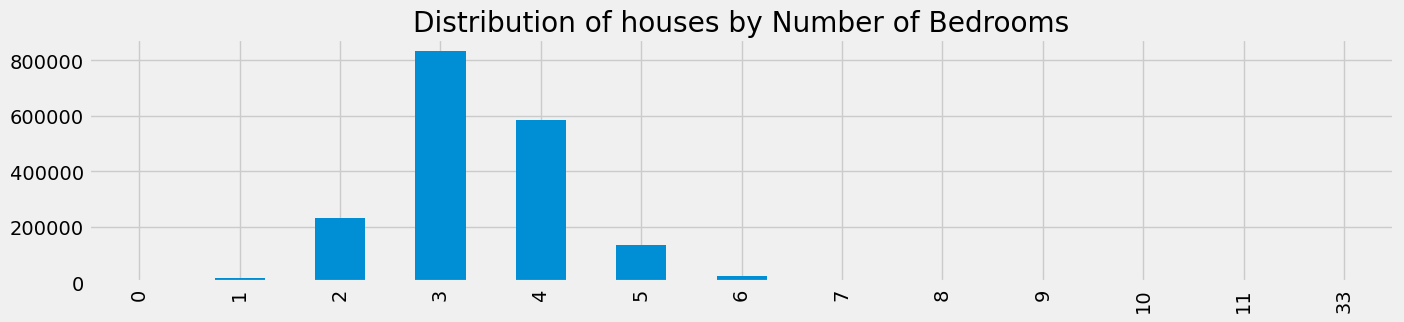

In [21]:
kingcounty["bedrooms"].value_counts().sort_index().plot(kind="bar", figsize =(15,3))
plt.title("Distribution of houses by Number of Bedrooms", )

Text(0.5, 1.0, 'Distribution of houses by Bathrooms')

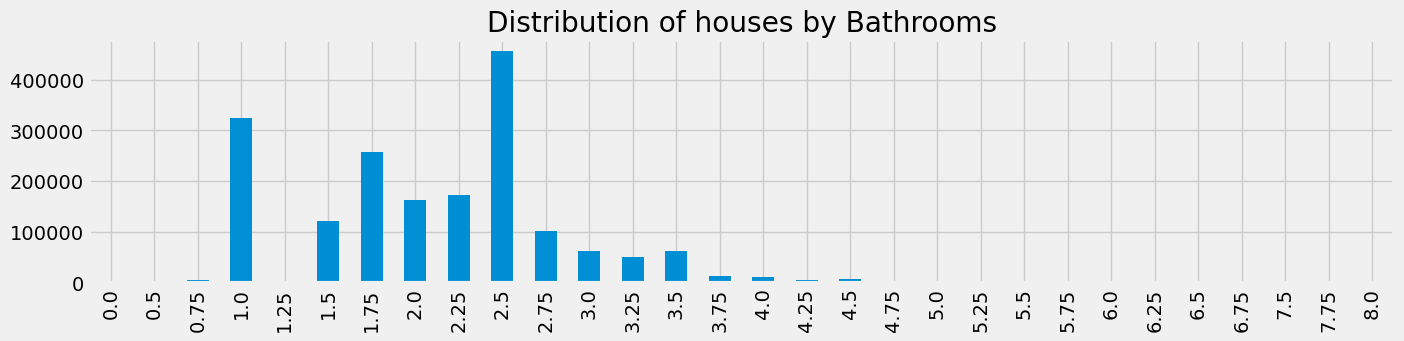

In [22]:
kingcounty["bathrooms"].value_counts().sort_index().plot(kind="bar", figsize =(15,3))
plt.title("Distribution of houses by Bathrooms")

In [23]:
kingcounty["view"].value_counts().sort_index()

0    1648706
1      28114
2      82076
3      42934
4      27059
Name: view, dtype: int64

Text(0.5, 1.0, 'Distribution of Houses by View')

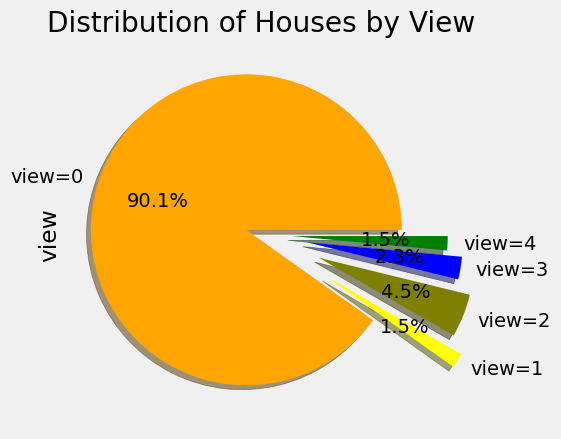

In [24]:
kingcounty["view"].value_counts().sort_index().plot(kind="pie",
                                                    colors=["orange", "yellow", "olive", "blue", "green"],
                                                    labels=["view=0", "view=1", "view=2", "view=3", "view=4"], 
                                                    autopct="%1.1f%%",
                                                   shadow=True,
                                                   explode=[0.1,0.5,0.4,0.3,0.2])
plt.title("Distribution of Houses by View")

In [25]:
kingcounty["waterfront"].value_counts()

0    1815047
1      13842
Name: waterfront, dtype: int64

Text(0.5, 1.0, 'Distribution of Houses by Grade ')

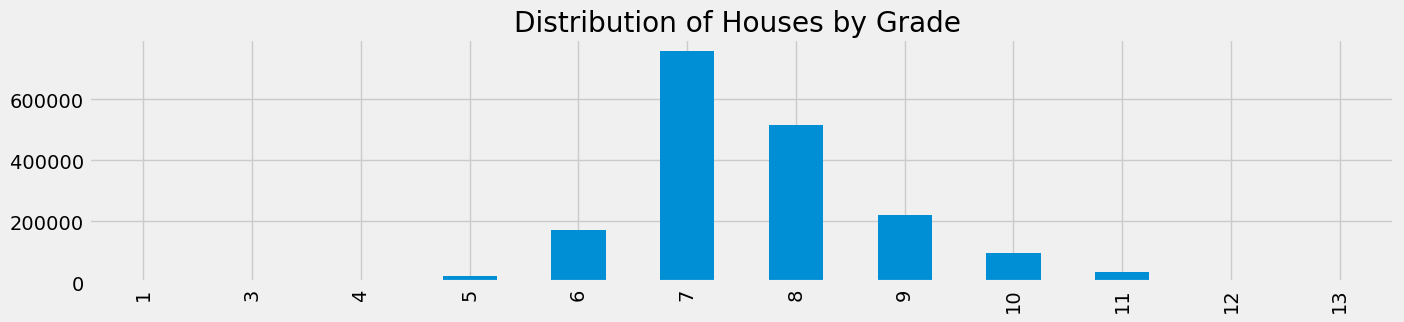

In [26]:
kingcounty["grade"].value_counts().sort_index().plot(kind="bar", figsize =(15,3))
plt.title("Distribution of Houses by Grade ")

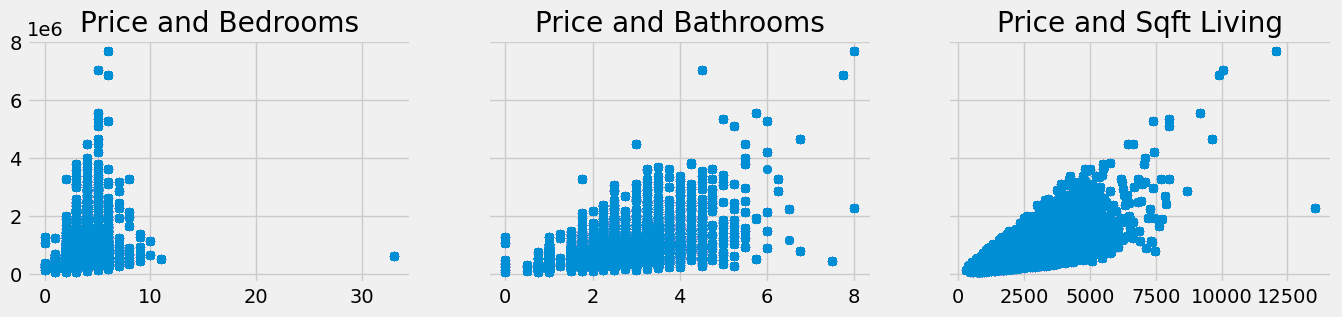

In [27]:
# Here we decided to use some matplotlib code
# You can simply use plt.scatter() for each of them
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(kingcounty['bedrooms'],kingcounty['price'])
ax1.set_title('Price and Bedrooms')
ax2.scatter(kingcounty['bathrooms'],kingcounty['price'])
ax2.set_title('Price and Bathrooms')
ax3.scatter(kingcounty['sqft_living'],kingcounty['price'])
ax3.set_title('Price and Sqft Living')

plt.show()

Text(0.5, 1.0, 'Price and Sqft Above')

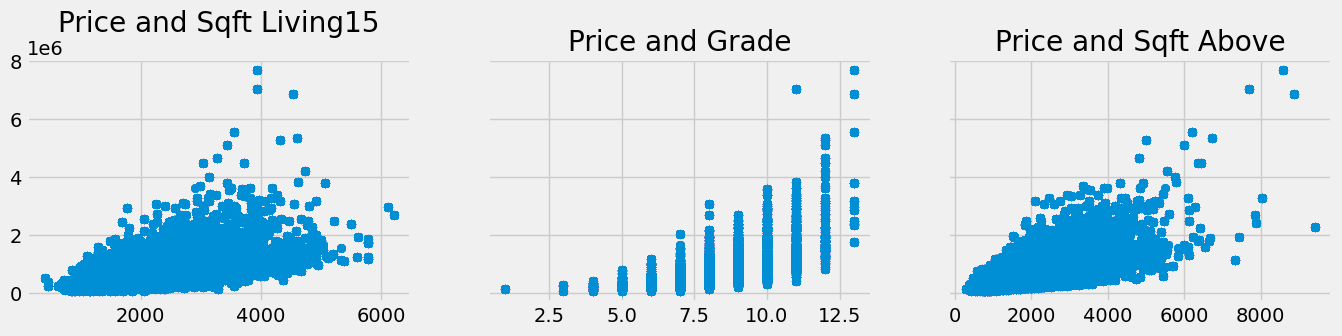

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(kingcounty['sqft_living15'],kingcounty['price'])
ax1.set_title('Price and Sqft Living15')
ax2.scatter(kingcounty['grade'],kingcounty['price'])
ax2.set_title('Price and Grade')
ax3.scatter(kingcounty['sqft_above'],kingcounty['price'])
ax3.set_title('Price and Sqft Above')

In [29]:
# Let's transform 'Price' with a log transformation
log_price = np.log(kingcounty['price'])

# Then we add it to our data frame
kingcounty['log_price'] = log_price
kingcounty

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,quarter,month,dayofweek,log_price
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,2014,4,10,0,12.309982
1,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,2014,4,10,0,12.309982
2,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,2014,4,10,0,12.309982
3,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,2014,4,10,0,12.309982
4,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,2014,4,10,0,12.309982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828884,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0,0,...,98144,47.5941,-122.299,1020,1357,2014,4,10,2,12.691580
1828885,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0,0,...,98144,47.5941,-122.299,1020,1357,2014,4,10,2,12.691580
1828886,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0,0,...,98144,47.5941,-122.299,1020,1357,2014,4,10,2,12.691580
1828887,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0,0,...,98144,47.5941,-122.299,1020,1357,2014,4,10,2,12.691580


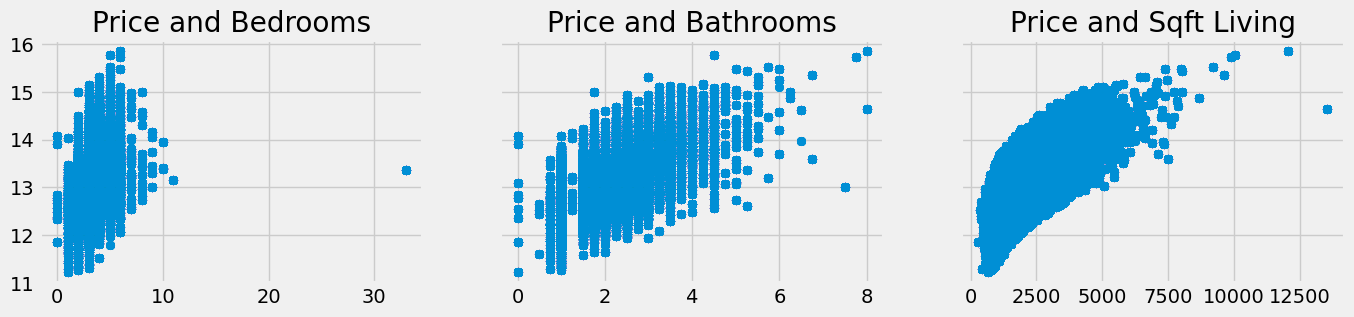

In [30]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(kingcounty['bedrooms'],kingcounty['log_price'])
ax1.set_title('Price and Bedrooms')
ax2.scatter(kingcounty['bathrooms'],kingcounty['log_price'])
ax2.set_title('Price and Bathrooms')
ax3.scatter(kingcounty['sqft_living'],kingcounty['log_price'])
ax3.set_title('Price and Sqft Living')


plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

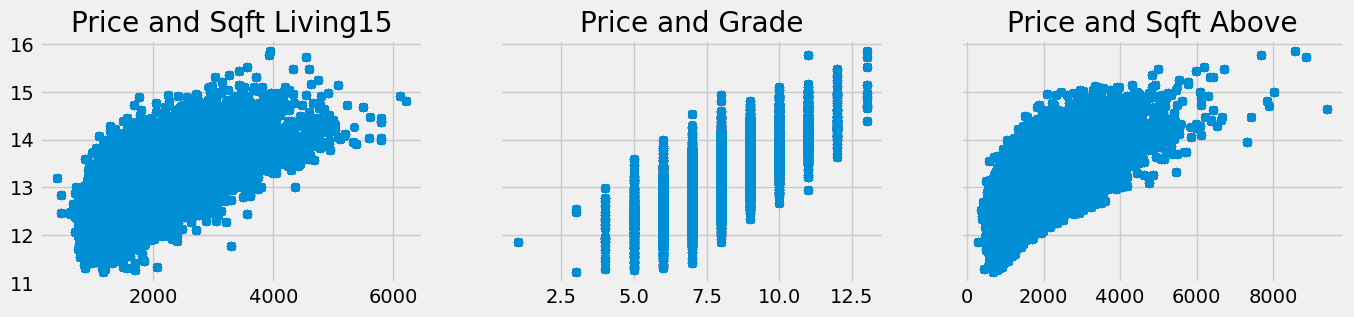

In [31]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(kingcounty['sqft_living15'],kingcounty['log_price'])
ax1.set_title('Price and Sqft Living15')
ax2.scatter(kingcounty['grade'],kingcounty['log_price'])
ax2.set_title('Price and Grade')
ax3.scatter(kingcounty['sqft_above'],kingcounty['log_price'])
ax3.set_title('Price and Sqft Above')
plt.show()

In [32]:
#Multicolinearity
# Let's quickly see the columns of our data frame
kingcounty.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year',
       'quarter', 'month', 'dayofweek', 'log_price'], dtype=object)

In [33]:
kingcounty_cleaned = kingcounty[['log_price','bedrooms', 'bathrooms', 'sqft_living','sqft_living15','sqft_basement','grade','view','sqft_above','waterfront','lat']]

In [34]:
# sklearn does not have a built-in way to check for multicollinearity
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
#all features where we want to check for multicollinearity
variables = kingcounty_cleaned[['bedrooms', 'bathrooms','sqft_living15','sqft_basement','grade','sqft_above','lat']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [35]:
# Let's explore the result
vif

,VIF,Features
0,21.681196,bedrooms
1,21.746203,bathrooms
2,25.369811,sqft_living15
3,2.225963,sqft_basement
4,132.363803,grade
5,25.815302,sqft_above
6,80.372921,lat


## Creating a multiple regression model

In [36]:
# There are several independent variables: 
inputs = kingcounty_cleaned[['bedrooms', 'bathrooms','sqft_living15','sqft_basement','sqft_above']]

# and a single dependent variable: 'price'
targets = kingcounty_cleaned['log_price']

In [37]:
#Standardization of the data
# Import the preprocessing module
# StandardScaler is one of the easiest and 'cleanest' ways to preprocess your data
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
# Fit the input data (x)
# Essentially we are calculating the mean and standard deviation feature-wise 
# (the mean of 'SAT' and the standard deviation of 'SAT', 
# as well as the mean of 'Rand 1,2,3' and the standard deviation of 'Rand 1,2,3')
scaler.fit(inputs)

StandardScaler()

In [40]:
# The actual scaling of the data is done through the method 'transform()'
# Let's store it in a new variable, named appropriately
inputs_scaled = scaler.transform(inputs)

In [41]:
# The result is an ndarray
inputs_scaled

array([[-0.39552231, -1.45106542, -0.94587214, -0.65830505, -0.73895726],
       [-0.39552231, -1.45106542, -0.94587214, -0.65830505, -0.73895726],
       [-0.39552231, -1.45106542, -0.94587214, -0.65830505, -0.73895726],
       ...,
       [-1.45877732, -1.77625821, -1.413438  , -0.65830505, -0.93257878],
       [-1.45877732, -1.77625821, -1.413438  , -0.65830505, -0.93257878],
       [-1.45877732, -1.77625821, -1.413438  , -0.65830505, -0.93257878]])

## TRAIN TEST SPLIT

In [42]:
# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [43]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [44]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

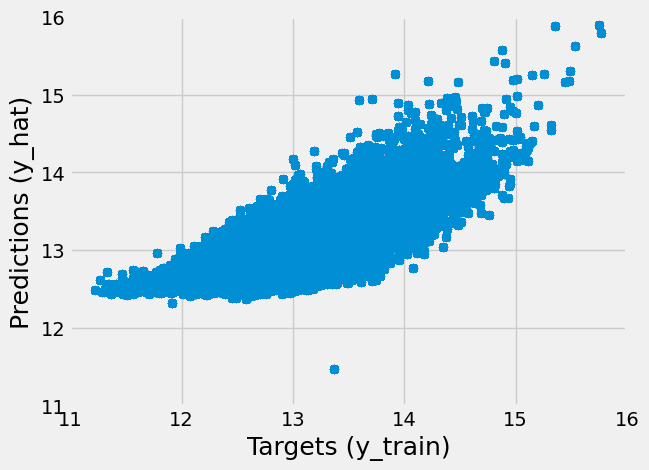

In [45]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(11,16)
plt.ylim(11,16)
plt.show()

In [46]:
import seaborn as sns

Text(0.5, 1.0, 'Residuals PDF')

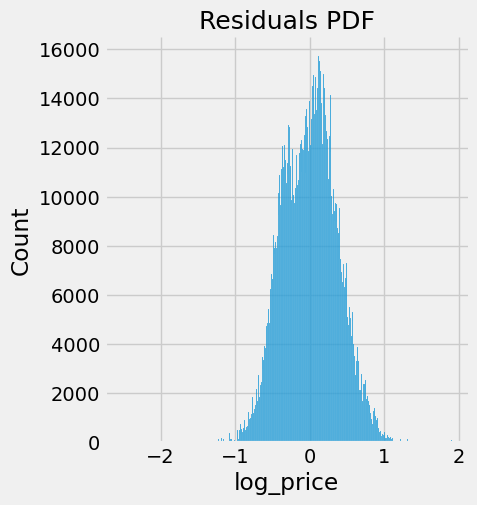

In [47]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.displot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [48]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.5122775652026543

In [49]:
# Let's see the coefficients
reg.coef_

array([-0.04254511,  0.04322438,  0.11932229,  0.15552498,  0.22764159])

In [50]:
# And the intercept
reg.intercept_

13.049599104423029

In [51]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,bedrooms,-0.042545
1,bathrooms,0.043224
2,sqft_living15,0.119322
3,sqft_basement,0.155525
4,sqft_above,0.227642


In [52]:
# Now we have a pretty clean summary, which can help us make an informed decision about the importance of each feature
reg_summary

,Features,Weights
0,bedrooms,-0.042545
1,bathrooms,0.043224
2,sqft_living15,0.119322
3,sqft_basement,0.155525
4,sqft_above,0.227642


## Testing

In [53]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

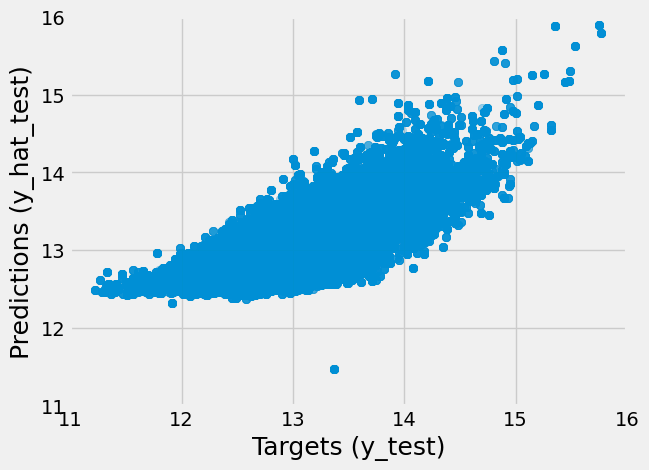

In [54]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(11,16)
plt.ylim(11,16)
plt.show()

In [55]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,510046.839178
1,407243.119798
2,587134.502831
3,421741.980676
4,370548.871773


In [56]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    13.547631
1    13.312984
2    13.153862
3    12.115601
4    13.028053
Name: log_price, dtype: float64

In [57]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,510046.839178,765000.0
1,407243.119798,605000.0
2,587134.502831,516000.0
3,421741.980676,182700.0
4,370548.871773,455000.0
...,...,...
365773,336065.026305,300000.0
365774,436614.588592,307000.0
365775,348296.644491,266200.0
365776,583397.436795,610000.0


In [58]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [59]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,510046.839178,765000.0,254953.160822,33.327211
1,407243.119798,605000.0,197756.880202,32.687088
2,587134.502831,516000.0,-71134.502831,13.785756
3,421741.980676,182700.0,-239041.980676,130.838523
4,370548.871773,455000.0,84451.128227,18.560688
...,...,...,...,...
365773,336065.026305,300000.0,-36065.026305,12.021675
365774,436614.588592,307000.0,-129614.588592,42.219736
365775,348296.644491,266200.0,-82096.644491,30.840212
365776,583397.436795,610000.0,26602.563205,4.361076


In [60]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,3.657780e+05,3.657780e+05,3.657780e+05,365778.000000
mean,5.073396e+05,5.408322e+05,3.349262e+04,31.117604
std,3.375616e+05,3.650155e+05,2.967018e+05,26.640909
min,9.564772e+04,7.500000e+04,-2.607941e+07,0.002533
25%,3.538710e+05,3.215000e+05,-1.045453e+05,12.707730
50%,4.355182e+05,4.500000e+05,3.525296e+03,25.861378
75%,5.670472e+05,6.487520e+05,1.254532e+05,42.552499
max,2.835941e+07,7.700000e+06,2.407384e+06,1143.833829


In [61]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
293634,444988.73,445000.00,11.27,0.00
193074,444988.73,445000.00,11.27,0.00
226336,444988.73,445000.00,11.27,0.00
308955,444988.73,445000.00,11.27,0.00
90451,444988.73,445000.00,11.27,0.00
...,...,...,...,...
126103,28359411.30,2280000.00,-26079411.30,1143.83
6785,28359411.30,2280000.00,-26079411.30,1143.83
169144,28359411.30,2280000.00,-26079411.30,1143.83
99550,28359411.30,2280000.00,-26079411.30,1143.83
